# Plot distributions of observables

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.plotting import plot_distributions


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Plot all

12:43 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
12:43 madminer.sampling    INFO    Found 2 parameters
12:43 madminer.sampling    DEBUG      cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
12:43 madminer.sampling    DEBUG      cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
12:43 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
12:43 madminer.sampling    DEBUG      sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
12:43 madminer.sampling    DEBUG      morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
12:43 madminer.sampling    DEBUG      morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02
12:43 madminer.sampling    DEBUG      morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02
12:43 madminer.sampling    DEBUG      morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53

12:43 madminer.sampling    DEBUG     24 deltaphi_lmet
12:43 madminer.sampling    DEBUG     25 deltaphi_amet
12:43 madminer.sampling    DEBUG     26 deltaeta_la
12:43 madminer.sampling    DEBUG     27 m_almet
12:43 madminer.sampling    DEBUG     28 pt_almet
12:43 madminer.sampling    DEBUG     29 mt
12:43 madminer.sampling    DEBUG     30 phi_minus
12:43 madminer.sampling    DEBUG     31 phi_plus
12:43 madminer.sampling    DEBUG     32 phi
12:43 madminer.sampling    INFO    Found 378309 events
12:43 madminer.sampling    INFO    Found morphing setup with 6 components
12:43 madminer.plotting    DEBUG   Loaded raw data with shapes (378309, 33), (378309, 103)
12:43 madminer.plotting    DEBUG   Calculated 2 theta matrices
12:43 madminer.plotting    DEBUG   Calculating effect of nuisance parameters
12:43 madminer.plotting    DEBUG   Drew 97000 toy values for nuisance parameters
12:43 madminer.plotting    DEBUG   Extracted nuisance benchmark and reference weights
12:58 madminer.plotting    DEB

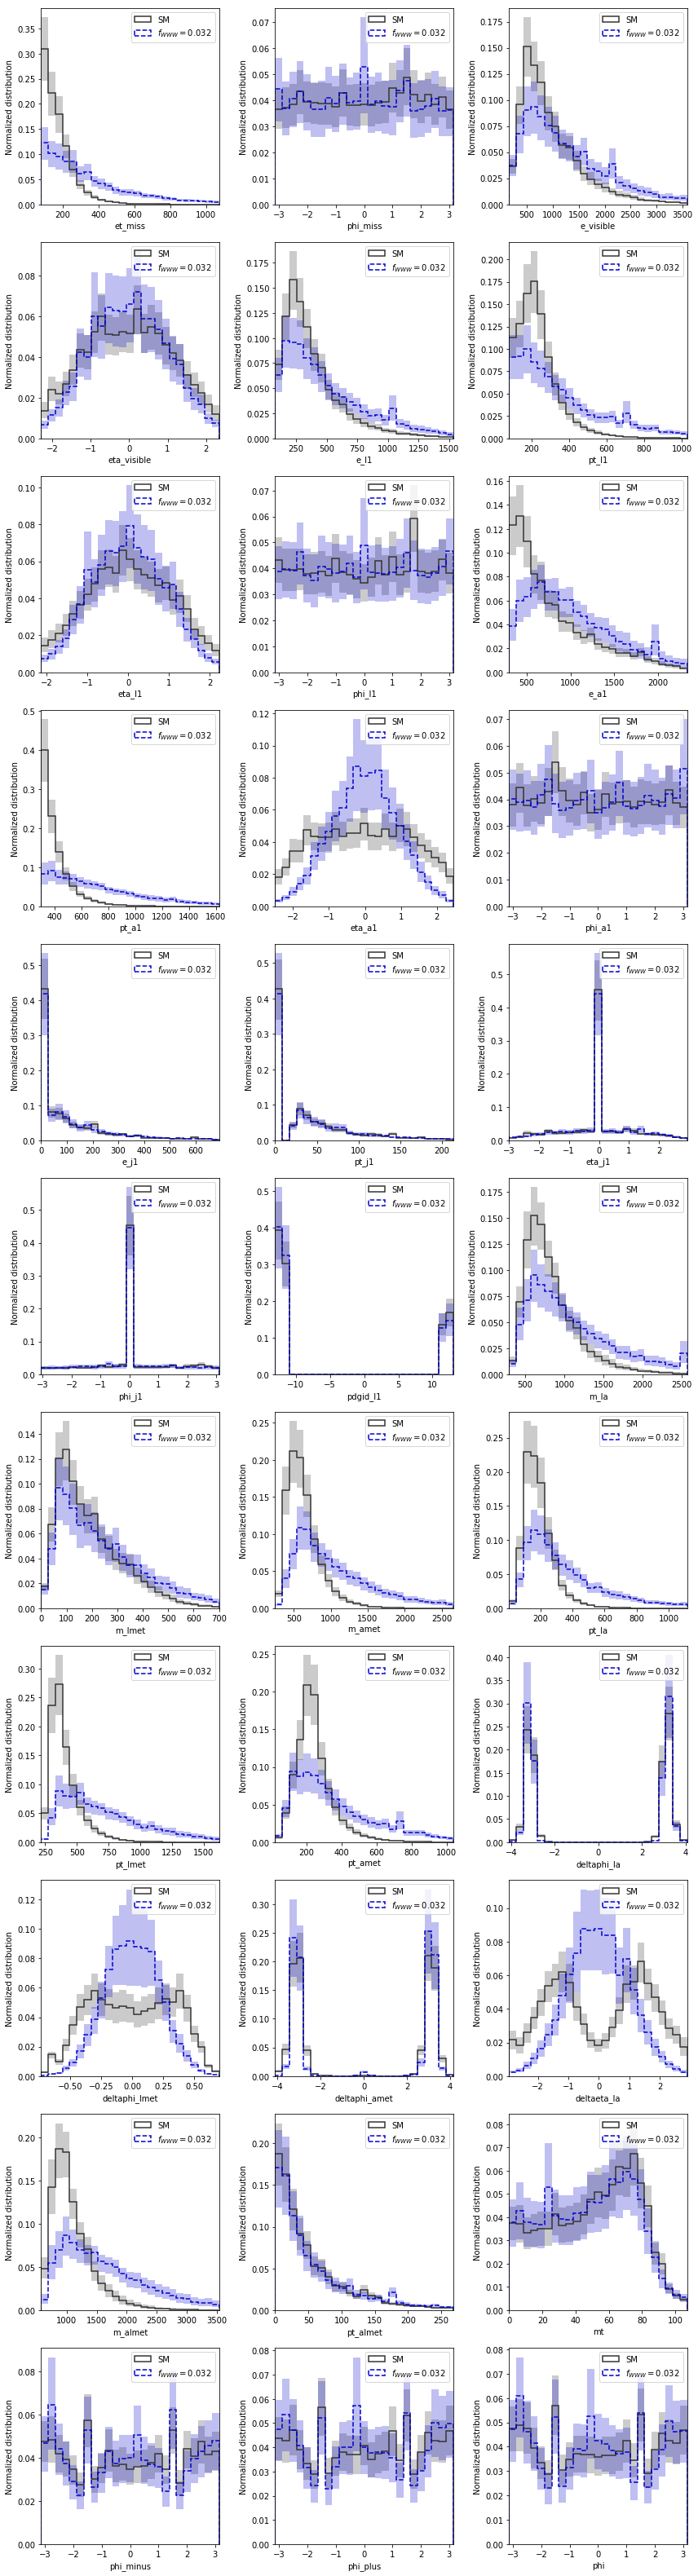

In [5]:
fig = plot_distributions(
    filename=sample_dir + 'samples_tight.h5',
    parameter_points=[np.array([0.,0.]),
                      np.array([0.032,0.])],
    normalize=True,
    line_labels=['SM', r'$f_{WWW} = 0.032$'],
    colors=['0.2', 'mediumblue'],
    alpha=0.25,
    linestyles=['-','--'],
    n_events=None,
    n_bins=25,
)

plt.savefig('../../figures/wgamma/observables.pdf')